# Tutorial on ProfileHistogram

In [1]:
from matplotlib import pyplot as plt
import poisson_approval as pa

## Profile

Generate a random profile:

In [2]:
generator_profile = pa.GeneratorProfileHistogramUniform(n_bins = 10)
profile = generator_profile()
profile

<abc: 0.2283177724372194 [0.01681934 0.15441964 0.07149361 0.0103879  0.00477677 0.00468168
 0.23755266 0.46880522 0.01960546 0.01145773], acb: 0.045771507052634 [0.07472504 0.03340931 0.00962379 0.00941899 0.29517598 0.09889542
 0.09899299 0.12891987 0.14661928 0.10421933], bac: 0.19248521927334128 [0.13524657 0.02250642 0.02579933 0.20392864 0.08543421 0.04282741
 0.10738777 0.26106346 0.1005135  0.01529269], bca: 0.33762082283997397 [0.06598086 0.00567613 0.0604436  0.07436286 0.40435495 0.01343427
 0.08686279 0.10592607 0.06958157 0.11337691], cab: 0.18974361994404743 [0.05046724 0.13161617 0.03049045 0.03669328 0.03437138 0.22834466
 0.16827399 0.24354454 0.00827359 0.0679247 ], cba: 0.0060610584527839295 [0.06814074 0.10053958 0.05068696 0.10999994 0.21313672 0.20649618
 0.04440661 0.05111743 0.0891455  0.06633036]> (Condorcet winner: b)

Share of each ranking:

In [3]:
profile.d_ranking_share

{abc: 0.2283177724372194, acb: 0.045771507052634, bac: 0.19248521927334128, bca: 0.33762082283997397, cab: 0.18974361994404743, cba: 0.0060610584527839295}

Distribution of the utilities for voters $abc$:

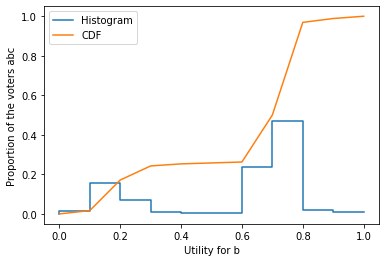

In [4]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

## Strategic Analysis

Generate a random strategy:

In [5]:
generator_strategy = pa.GeneratorStrategyThresholdUniform()
strategy = generator_strategy()
strategy

<abc: utility-dependent (0.8734045676578399), acb: utility-dependent (0.06848251734326449), bac: utility-dependent (0.15289048540828432), bca: utility-dependent (0.685726398358069), cab: utility-dependent (0.2975392203549041), cba: utility-dependent (0.2329924633957775)>

Tau vector (ballot shares) associated to the strategy in the given profile:

In [6]:
tau = profile.tau(strategy)
tau

<a: 0.22685357783447793, ab: 0.1679674429825053, ac: 0.19298066681140863, b: 0.26422567384667867, bc: 0.10665673094746782, c: 0.04131590757746169> ==> a

Is the strategy an equilibrium for the given profile?

In [7]:
profile.is_equilibrium(strategy)

EquilibriumStatus.NOT_EQUILIBRIUM

Use iterated voting to search for an equilibrium:

In [8]:
result = profile.iterated_voting(strategy_ini=strategy, n_max_episodes=1000, 
                                 ballot_update_ratio=0.1)
cycle_taus_actual = result['cycle_taus_actual']
cycle_strategies = result['cycle_strategies']

In [9]:
cycle_taus_actual

[<a: 0.24647100353693238, ac: 0.21736189589696864, b: 0.399105869450325, bc: 0.13706123111577434> ==> b]

In [10]:
if len(cycle_taus_actual) == 0:
    print('No convergence.')
elif len(cycle_taus_actual) == 1:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % cycle_strategies[0])
    print('Limit tau-vector: %s' % cycle_taus_actual[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle_taus_actual))

Convergence to an equilibrium.
Limit strategy: <abc: a, acb: utility-dependent (0.49127719824672345), bac: b, bca: utility-dependent (0.5087228017532764), cab: ac, cba: bc> ==> b
Limit tau-vector: <a: 0.24647100353693238, ac: 0.21736189589696864, b: 0.399105869450325, bc: 0.13706123111577434> ==> b


There is another version of iterated voting, ``fictitious_play``. It allows for update ratios that depend on time, it is faster, but it is not able to detect limit cycles (only convergence). Cf. Reference section for more information.

In [11]:
from math import log
result = profile.fictitious_play(strategy_ini=strategy, n_max_episodes=1000, 
                                 perception_update_ratio=lambda t: 1 / log(t + 2),
                                 ballot_update_ratio=0.1)
limit_tau = result['tau']
limit_strategy = result['strategy']

In [12]:
if limit_tau is None:
    print('No convergence.')
else:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % limit_strategy)
    print('Limit tau-vector: %s' % limit_tau)

Convergence to an equilibrium.
Limit strategy: <abc: a, acb: utility-dependent (0.49127719895871375), bac: b, bca: utility-dependent (0.5087228010412863), cab: ac, cba: bc> ==> b
Limit tau-vector: <a: 0.24647100363312688, ac: 0.21736189580077395, b: 0.39910586941803106, bc: 0.1370612311480681> ==> b
